In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [122,  78,  41],
        [121,  78,  45],
        [120,  79,  47]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [123,  78,  44],
        [120,  79,  47],
        [118,  80,  50]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [124,  79,  46],
        [122,  78,  49],
        [118,  77,  52]],

       ...,

       [[129, 101,  67],
        [119,  91,  57],
        [118,  90,  56],
        ...,
        [ 26,  11,   8],
        [ 27,  12,   9],
        [ 28,  13,  10]],

       [[108,  74,  45],
        [112,  80,  51],
        [109,  79,  52],
        ...,
        [ 22,   9,   7],
        [ 26,  11,   8],
        [ 29,  12,   9]],

       [[100,  49,  23],
        [ 92,  45,  23],
        [ 77,  35,  16],
        ...,
        [ 23,  10,   8],
        [ 29,  12,   9],
        [ 33,  14,  11]]

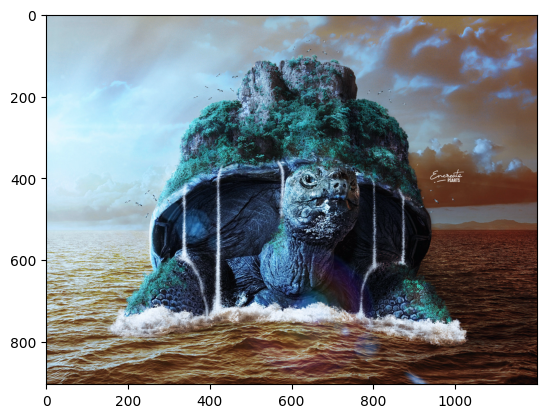

In [4]:
img = cv2.imread('turtle.jpg')
plt.imshow(img)

cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()

cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)
cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)



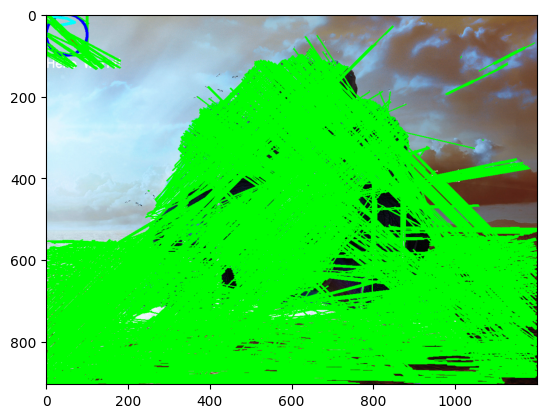

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=1,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

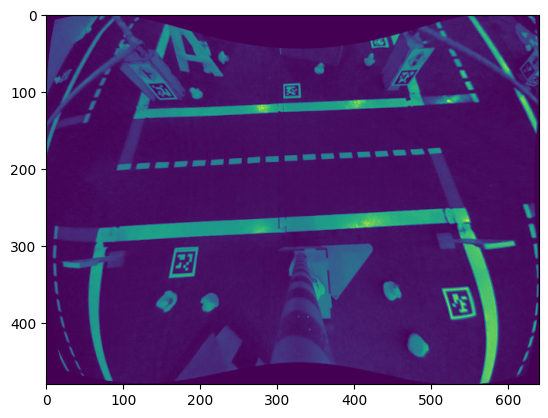

In [13]:
from dt_apriltags import Detector

img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)


color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))


plt.imshow(img)

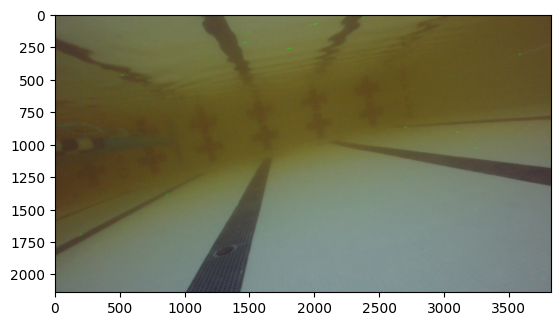

In [29]:
img = cv2.imread("lanes.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 100, apertureSize=5) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=20,
                maxLineGap=1,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)